<a href="https://colab.research.google.com/github/thsdornelas/colab_script/blob/main/processamento_mapbiomas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados dos usos e cobertura dos anos 1985, 2000 e 2020

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data_file = '/content/drive/MyDrive/dados_doutorado/areas_mapbiomas.csv'

In [ ]:
data = pd.read_csv(data_file)
classes = data.drop(columns=['system:index','.geo']).loc[data['class'] != 0] #Deleta as colunas e linhas com valor 0
#classes.groupby('class')[['area']].sum(numeric_only=True) #Apresenta as classes únicas

In [ ]:
#print(classes.dtypes) #Apresenta os tipos de campos


ID2      float64
area     float64
class      int64
year       int64
dtype: object


In [ ]:
#Função para mapear os valores de ID2
def set_value(row_number, assigned_value):
  return assigned_value[row_number]

#Dicionário
polos = {13.0: 'Alto Paracatu/Entre Ribeiros',
         16.0: 'Alto Rio Preto',
         21.0: 'São Marcos'}

class_mapeamento = {
    #0: 'Nulo',
    3: 'Formação florestal',
    4: 'Formação savânica',
    5: 'Mangue',
    6: 'Floresta alagável',
    49: 'Restinga arbórea',
    11: 'Campo alagado e área pantanosa',
    12: 'Formação campestre',
    32: 'Apicum',
    29: 'Afloramento rochoso',
    50: 'Restinga herbácea',
    13: 'Outras formações não florestais',
    15: 'Pastagem',
    39: 'Soja',
    20: 'Cana',
    40: 'Arroz',
    62: 'Algodão',
    41: 'Outras lavouras temporárias',
    46: 'Café',
    47: 'Citrus',
    35: 'Dendê',
    48: 'Outras lavouras perenes',
    9: 'Silvicultura',
    21: 'Mosaico de usos',
    23: 'Praia, duna e areal',
    24: 'Área urbanizada',
    30: 'Mineração',
    25: 'Outras áreas não vegetadas',
    33: "Massa d'água",
    31: 'Aquicultura',
    27: 'Não observado'
}

#Função para classificar utilizando as classes mais generalizadas
def reclass_geral(class_nm):
  match class_nm:
    case _ if class_nm in (3,4,5,6,49):
      return 'Floresta'
    case _ if class_nm in (11,12,32,29,50,13):
      return 'Formação natural não florestal'
    case _ if class_nm == 15:
      return 'Pastagem'
    case _ if class_nm in (39,20,40,62,41,46,47,35,48):
      return 'Agricultura'
    case _ if class_nm == 9:
      return 'Silvicultura'
    case _ if class_nm == 21:
      return 'Mosaico de usos'
    case _ if class_nm in (23,24,30,25):
      return 'Área não vegetada'
    case _ if class_nm in (33,31):
      return "Massa d'água"
    case _ if class_nm == 27:
      return 'Não observado'

#Adicionar nova coluna
classes['nm_polo'] = classes['ID2'].apply(set_value, args=(polos,)) #Cria o campo e popula com os dados dos polos
classes['nm_classes'] = classes['class'].apply(set_value, args=(class_mapeamento,))
classes['nm_classes_gerais'] = classes['class'].apply(reclass_geral)
classes = classes.drop(columns=['ID2','class'])
#classes.head()



In [ ]:
#classes['nm_classes_gerais'].unique()

#classes.sort_values('nm_classes_gerais')

array(['Floresta', 'Silvicultura', 'Formação natural não florestal',
       'Pastagem', 'Mosaico de usos', 'Área não vegetada', "Massa d'água",
       'Agricultura'], dtype=object)

In [ ]:
#Preparando o dado com a função melt
#Fonte: https://github.com/peixebabel/COVID-19/blob/master/Obitos_BR_por_data.ipynb
dados_uso = classes[['nm_classes_gerais', 'nm_polo', 'year', 'area']].sort_values('nm_classes_gerais')
#dados_uso = dados_uso.melt(id_vars = ['nm_polo'], value_vars = ['nm_classes', 'area',])
#display(dados_uso)


In [ ]:
dados_uso

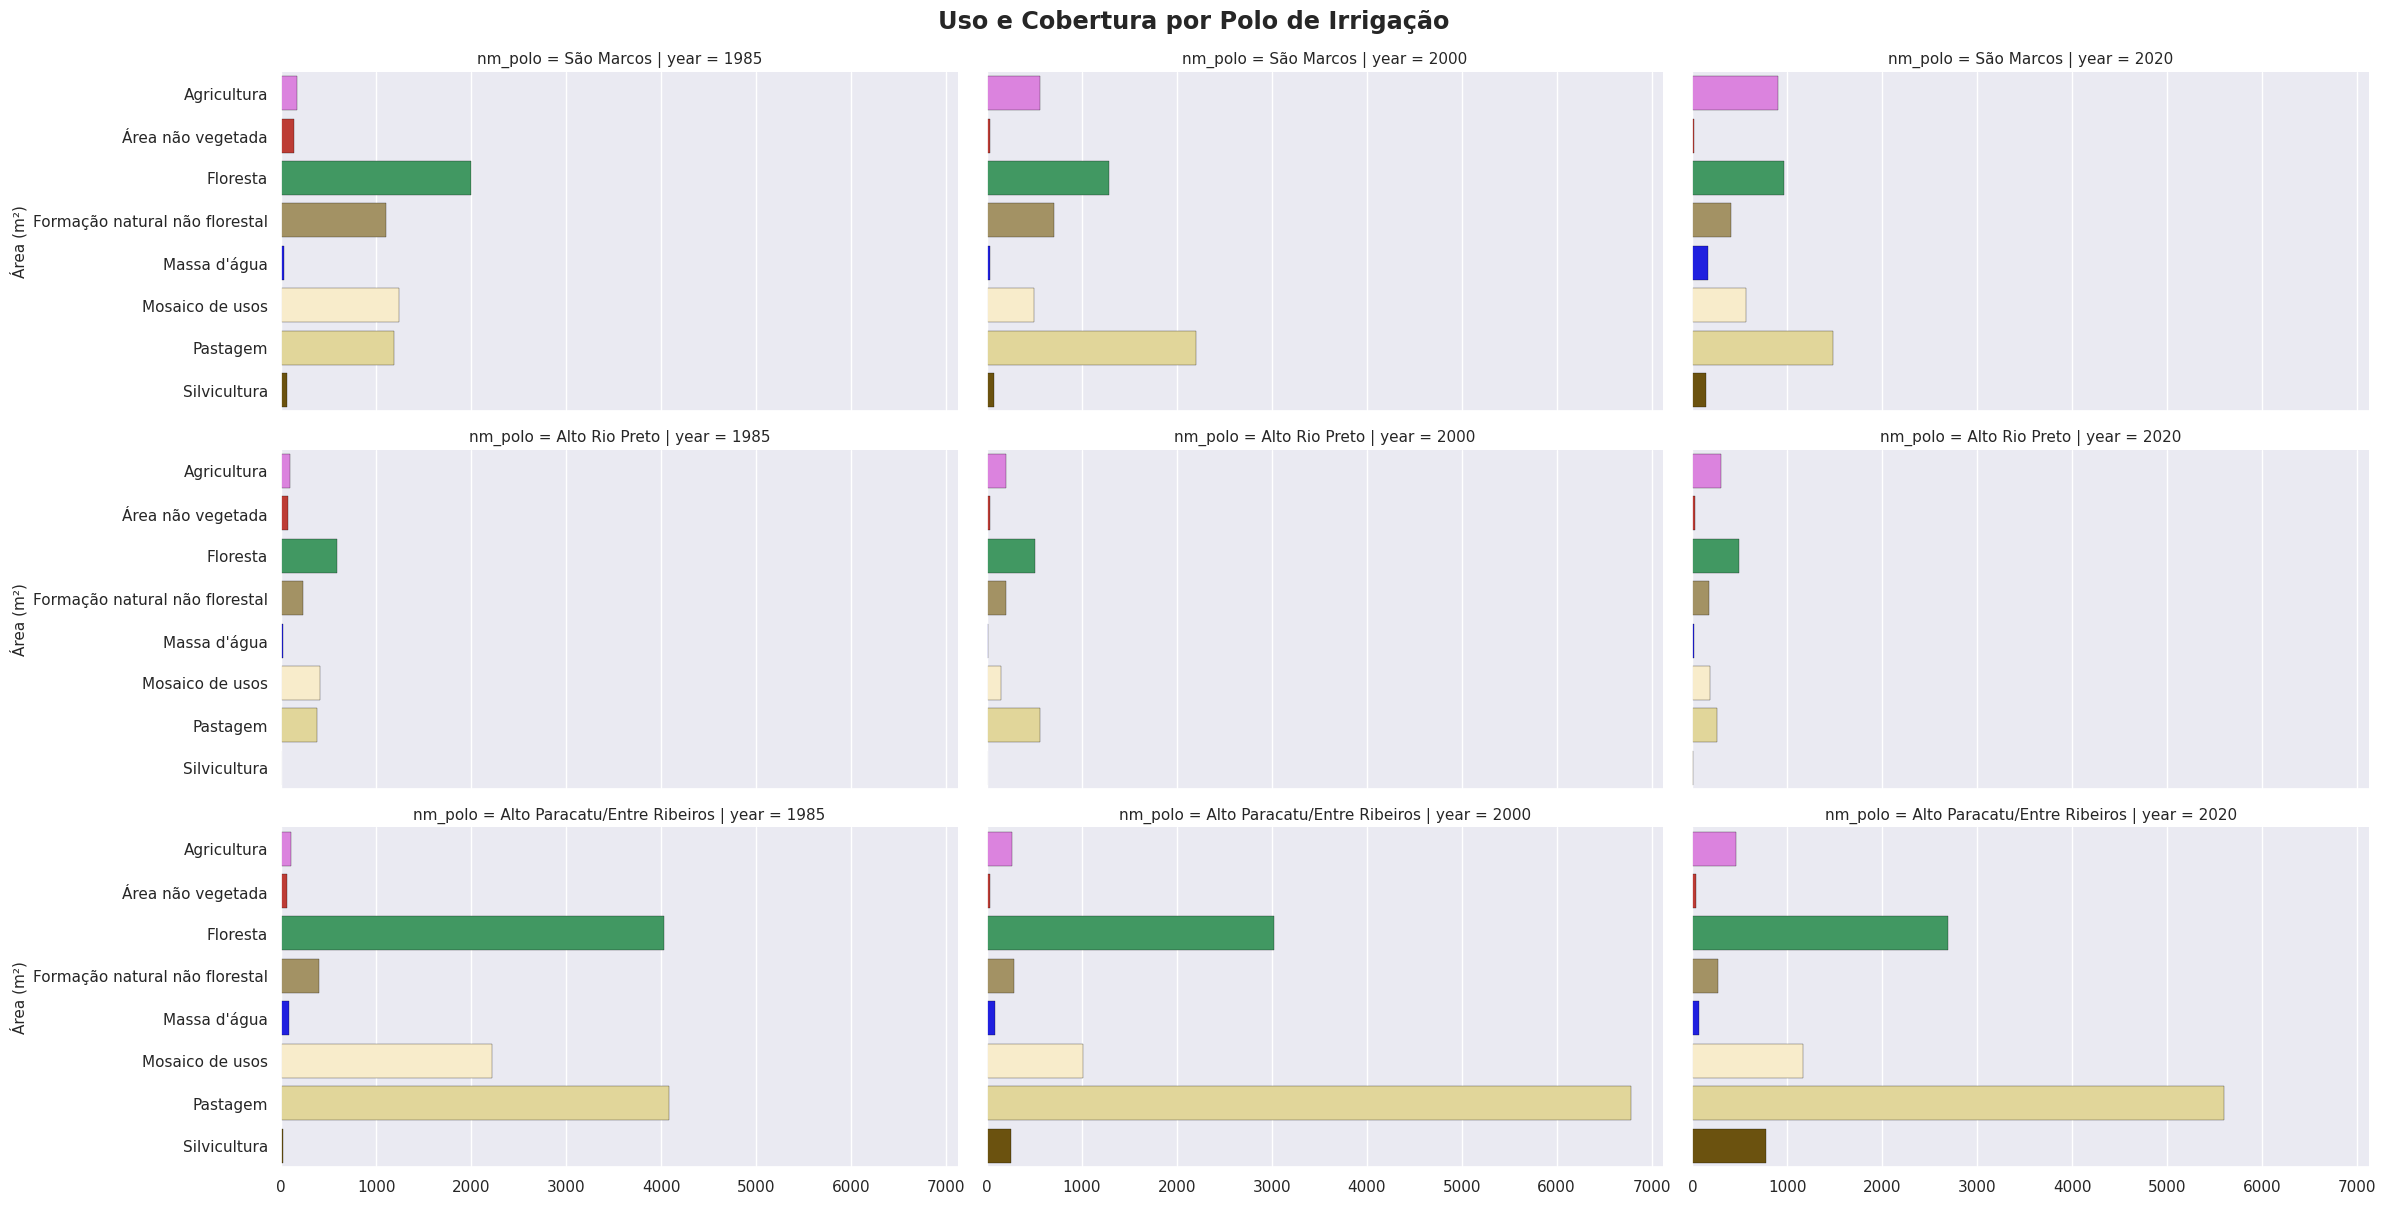

In [ ]:
palette_dict = {'Agricultura': '#E974ED',
                'Área não vegetada': '#d4271e',
                'Floresta': '#32a65e',
                'Formação natural não florestal': '#ad975a',
                "Massa d'água": '#0000FF',
                'Mosaico de usos': '#ffefc3',
                'Pastagem': '#edde8e',
                'Silvicultura': '#7a5900'
                }

sns.set_theme()
#plt.figure(figsize = (10, 5))
#Ajuste do tamanho do gráfico e da fonte
sns.set(rc = {'figure.figsize': (10,5),
              'axes.labelsize':11})
"""grafico = sns.barplot(data = dados_uso, x = 'year', y = 'area', hue = 'nm_classes_gerais',
            dodge = True, palette = palette_dict, errorbar = ('ci', 0), edgecolor = 'black', linewidth = .2)"""
"""grafico = sns.displot(data = dados_uso, y = 'area', hue='nm_classes_gerais', col='nm_polo',
                      kind='hist', height=4, aspect = .7,)"""
grafico = sns.FacetGrid(dados_uso, row = 'nm_polo', col = 'year', height = 4, aspect = 2,legend_out = True
                        )
grafico.map(sns.barplot, 'area', 'nm_classes_gerais', palette = palette_dict,
            order = ['Agricultura', 'Área não vegetada','Floresta','Formação natural não florestal',
                     "Massa d'água",'Mosaico de usos','Pastagem','Silvicultura'],
            errorbar = ('ci', 0), edgecolor = 'black', linewidth = .2, )
grafico.fig.suptitle('Uso e Cobertura por Polo de Irrigação', y = 1.02, horizontalalignment = 'center', fontsize = 'x-large',
                     fontweight = 'bold')
#grafico.add_legend()
grafico.set_axis_labels('', 'Área (m²)')
grafico.set_titles()
"""grafico.set_xlabel('Ano', fontdict ={
    'weight': 'bold', 'style': 'italic',
    'size': 11, 'rotation': 'horizontal'})
grafico.set_ylabel('Área (m²)', fontdict ={
    'weight': 'bold', 'style': 'italic',
    'size': 11, 'rotation': 'vertical'})"""
#plt.setp(grafico.get_legend().get_title(), fontsize = '15', weight = 'bold')
#plt.setp(grafico.get_legend().get_texts(), fontsize = '11')
plt.show()


In [ ]:
# Valores únicos
#classes['nm_classes'].unique()
# Sort
#classes.sort_values(by=['nm_classes'])

In [ ]:
#classes.groupby(['nm_classes','nm_polo']).describe()
#classes.info()